In [1]:
import pandas as pd
import ngeht_predictions
import numpy as np
import matplotlib.pyplot as plt

import scipy.stats as stats

from sklearn.linear_model import LinearRegression

from matplotlib.ticker import FuncFormatter
import matplotlib.transforms as mtransforms

Welcome to eht-imaging! v 1.2.10 



In [2]:
def rms(array): # Root mean square
    return np.sqrt(np.nanmean(np.square(array)))

def rms_distance(array):

    rms_x = rms(array[...,0])
    rms_y = rms(array[...,1])
    return np.sqrt(rms_x**2 + rms_y**2)

def zero_to_nan(array):
    array[array == 0] = np.nan
    return array

In [3]:
fn = '/Volumes/GalagaResearch/Developer/blackholes/coreshift_practice/coreshift/SR1_3C279_2017_101_hi_hops_netcal_StokesI.uvfits'


tenna_list_4 = ['AP', 'AZ', 'JC', 'LM']

ngeht_4tennas_phase_05_3scans = ngeht_predictions.load(uvfits=fn, scans=True)
ngeht_4tennas_phase_05_3scans.load_uvfits()
ngeht_4tennas_phase_05_3scans.add_columns_random_thermal_atm_delay(number_of_scans=2, phase_error=0.55, freq=215)
ngeht_4tennas_phase_05_3scans.select_antennas(tenna_list=tenna_list_4)
ngeht_4tennas_phase_05_3scans.grouped_table_time()
ngeht_4tennas_phase_05_3scans.remove_scans_tenna_set(tenna_list=tenna_list_4)
ngeht_4tennas_phase_05_3scans.thermal_atm.calculate_atm_error(n_runs=100, phase_error=0.55, num_of_scans=2)

Loading uvfits:  /Volumes/GalagaResearch/Developer/blackholes/coreshift_practice/coreshift/SR1_3C279_2017_101_hi_hops_netcal_StokesI.uvfits
no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
No NX table in uvfits!


/Users/galagabits/miniconda3/envs/masers/lib/python3.13/site-packages/ehtim/statistics/dataframes.py:198: FutureWarning: The provided callable <function min at 0x1096354e0> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  vis_avg = vis.groupby(grouping).agg(aggregated).reset_index()
/Users/galagabits/miniconda3/envs/masers/lib/python3.13/site-packages/ehtim/statistics/dataframes.py:198: FutureWarning: The provided callable <function min at 0x1096354e0> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  vis_avg = vis.groupby(grouping).agg(aggregated).reset_index()
/Users/galagabits/miniconda3/envs/masers/lib/python3.13/site-packages/ehtim/statistics/dataframes.py:198: FutureWarning: The provided callable <function mean at 0x109635da0> is currently

In [5]:
ngeht_4tennas_phase_05_3scans.list_of_tables_perscan[0]

,Baseline Length (m),Baseline Angle (rad),SNR,tele1,tele2,Time,psi,u_coords,v_coords,phase,phase_seconds,tenna1_tau_1,tenna2_tau_1,tenna1_tau_2,tenna2_tau_2
79,5.443075e+06,2.554012,135.785141,AP,LM,5.251389,1.768614,2.314913e+09,-3.475547e+09,1.172496,8.113417e-13,2.198255e-13,-7.900650e-14,-5.684943e-14,-1.237534e-13
80,7.022747e+06,2.537442,107.454418,AP,AZ,5.251389,1.752044,3.060628e+09,-4.434107e+09,0.096162,6.654217e-14,2.198255e-13,9.770679e-14,-5.684943e-14,-2.266585e-13
82,8.502728e+06,2.090998,36.843337,AP,JC,5.251389,1.305600,5.660365e+09,-3.242427e+09,-2.040287,-1.411834e-12,2.198255e-13,-9.620169e-15,-5.684943e-14,-5.107847e-14
83,1.582992e+06,-0.661155,416.606765,AZ,LM,5.251389,-1.446553,-7.457177e+08,9.585590e+08,1.339056,9.265976e-13,9.770679e-14,-7.900650e-14,-2.266585e-13,-1.237534e-13
85,3.727649e+06,1.140990,160.787497,AZ,JC,5.251389,0.355592,2.599730e+09,1.191681e+09,1.757469,1.216130e-12,9.770679e-14,-9.620169e-15,-2.266585e-13,-5.107847e-14
88,4.371179e+06,-1.640367,11.093901,JC,LM,5.251389,-2.425766,-3.345445e+09,-2.331223e+08,1.704612,1.179554e-12,-9.620169e-15,-7.900650e-14,-5.107847e-14,-1.237534e-13


In [10]:
ngeht_predictions.utilities.station_code_key

{'AA': 0, 'AP': 1, 'AZ': 2, 'JC': 3, 'LM': 4, 'PV': 5, 'SM': 6, 'SP': 7}

In [ ]:
import ngeht_predictions.thermal_atm


tau1 = ngeht_4tennas_phase_05_3scans.thermal_atm.generate_rand_atm_delay(8, 0.55, 215)
tau2 = ngeht_4tennas_phase_05_3scans.thermal_atm.generate_rand_atm_delay(8, 0.55, 215)



array([ 7.41796175e-14, -1.74230595e-13,  6.62301899e-14,  2.09616205e-13,
       -1.44611453e-13,  7.05888003e-15, -3.10901627e-14, -7.48520061e-15])

In [ ]:
number_of_scans = 5
for i in range(number_of_scans):
    tau_str_tenna1 = 'tenna1_tau_1' + str(i+1)
    tau_str_tenna2 = 'tenna2_tau_' + str(i+1)
    tau = ngeht_4tennas_phase_05_3scans.thermal_atm.generate_rand_atm_delay(8, 0.55, 215)
    tenna1_tau = []
    tenna2_tau = []
    for ant1, ant2 in zip(ngeht_4tennas_phase_05_3scans.table['tele1'], ngeht_4tennas_phase_05_3scans.table['tele2']):
        tenna1_tau.append(tau[ngeht_predictions.utilities.station_code_key[ant1]])
        tenna2_tau.append(tau[ngeht_predictions.utilities.station_code_key[ant2]])

    ngeht_4tennas_phase_05_3scans.table[tau_str_tenna1] = tenna1_tau
    ngeht_4tennas_phase_05_3scans.table[tau_str_tenna2] = tenna2_tau
    

/var/folders/31/0kzd8c111cj87_n2y45gkb700000gn/T/ipykernel_97794/2156558941.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ngeht_4tennas_phase_05_3scans.table[tau_str_tenna1] = tenna1_tau
/var/folders/31/0kzd8c111cj87_n2y45gkb700000gn/T/ipykernel_97794/2156558941.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ngeht_4tennas_phase_05_3scans.table[tau_str_tenna2] = tenna2_tau
/var/folders/31/0kzd8c111cj87_n2y45gkb700000gn/T/ipykernel_97794/2156558941.py:12: SettingWithCopyWarning: 
A value is tryin

In [24]:
ngeht_4tennas_phase_05_3scans.table

,Baseline Length (m),Baseline Angle (rad),SNR,tele1,tele2,Time,psi,u_coords,v_coords,phase,...,tenna1_tau_1,tenna2_tau_1,tenna1_tau_2,tenna2_tau_2,tenna1_tau_3,tenna2_tau_3,tenna1_tau_4,tenna2_tau_4,tenna1_tau_5,tenna2_tau_5
18,4.882264e+06,2.649476,45.488052,AP,LM,2.201389,1.864078,1.769795e+09,-3.301181e+09,-0.404119,...,1.466675e-13,-1.240701e-13,9.234041e-14,-1.516359e-13,-2.142752e-13,1.874686e-13,2.358321e-13,-6.482742e-14,-1.468235e-13,-1.278594e-13
28,5.055118e+06,2.604034,69.433262,AP,LM,2.809722,1.818636,1.985832e+09,-3.331287e+09,-0.473114,...,1.466675e-13,-1.240701e-13,9.234041e-14,-1.516359e-13,-2.142752e-13,1.874686e-13,2.358321e-13,-6.482742e-14,-1.468235e-13,-1.278594e-13
36,1.271091e+06,-0.297658,204.428956,AZ,LM,3.368056,-1.083056,-2.860017e+08,9.322952e+08,1.732878,...,-1.061845e-13,-1.240701e-13,-5.414352e-14,-1.516359e-13,-1.087572e-13,1.874686e-13,-2.994168e-13,-6.482742e-14,4.369792e-13,-1.278594e-13
45,6.439273e+06,2.625113,52.862893,AP,AZ,3.412500,1.839715,2.439576e+09,-4.295810e+09,-1.786817,...,1.466675e-13,-1.061845e-13,9.234041e-14,-5.414352e-14,-2.142752e-13,-1.087572e-13,2.358321e-13,-2.994168e-13,-1.468235e-13,4.369792e-13
46,5.201363e+06,2.573343,69.484580,AP,LM,3.412500,1.787945,2.147502e+09,-3.363347e+09,-0.363867,...,1.466675e-13,-1.240701e-13,9.234041e-14,-1.516359e-13,-2.142752e-13,1.874686e-13,2.358321e-13,-6.482742e-14,-1.468235e-13,-1.278594e-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,8.913477e+06,2.158284,76.763392,AP,JC,8.651389,1.372886,5.691843e+09,-3.790328e+09,-0.309194,...,1.466675e-13,-2.468531e-13,9.234041e-14,-1.505204e-13,-2.142752e-13,-5.271322e-14,2.358321e-13,1.792387e-13,-1.468235e-13,1.051688e-13
397,6.848015e+06,2.676433,63.876787,AP,AZ,8.651389,1.891035,2.356663e+09,-4.695566e+09,2.428120,...,1.466675e-13,-1.061845e-13,9.234041e-14,-5.414352e-14,-2.142752e-13,-1.087572e-13,2.358321e-13,-2.994168e-13,-1.468235e-13,4.369792e-13
400,1.956171e+06,-0.799189,202.536070,AZ,LM,8.651389,-1.584587,-1.075737e+09,1.046469e+09,2.384097,...,-1.061845e-13,-1.240701e-13,-5.414352e-14,-1.516359e-13,-1.087572e-13,1.874686e-13,-2.994168e-13,-6.482742e-14,4.369792e-13,-1.278594e-13
401,4.504512e+06,1.305761,166.649986,AZ,JC,8.651389,0.520362,3.335183e+09,9.052382e+08,0.142526,...,-1.061845e-13,-2.468531e-13,-5.414352e-14,-1.505204e-13,-1.087572e-13,-5.271322e-14,-2.994168e-13,1.792387e-13,4.369792e-13,1.051688e-13


In [ ]:
number_of_scans = 2
for i in range(number_of_scans):
    tau_str = 'tau_' + str(i+1)
    ngeht_4tennas_phase_05_3scans.table[] = ngeht_4tennas_phase_05_3scans.thermal_atm.generate_rand_atm_delay(8, 0.55, 215)
    

(array([ 7.41796175e-14, -1.74230595e-13,  6.62301899e-14,  2.09616205e-13,
        -1.44611453e-13,  7.05888003e-15, -3.10901627e-14, -7.48520061e-15]),
 array([-2.29970572e-13,  1.36260037e-13,  1.50819310e-13,  2.18671807e-13,
         3.39880520e-13, -6.30120324e-14,  3.86403899e-13,  6.33338410e-14]))

$$\psi (u,v) = (u\cdot x + v \cdot y) $$

In [ ]:
fn = '/Volumes/GalagaResearch/Developer/blackholes/coreshift_practice/coreshift/SR1_3C279_2017_101_hi_hops_netcal_StokesI.uvfits'

tenna_list_2 = ['AP', 'AZ',]

ngeht_2tennas_phase_05 = ngeht_predictions.load(uvfits=fn, scans=True)
ngeht_2tennas_phase_05.load_uvfits()
ngeht_2tennas_phase_05.select_antennas(tenna_list=tenna_list_2)
ngeht_2tennas_phase_05.grouped_table_time()
ngeht_2tennas_phase_05.remove_scans_tenna_set(tenna_list=tenna_list_2)
ngeht_2tennas_phase_05.thermal_atm.calculate_antenna_based_delay_2D(n_runs=1000, phase_error=0.55, num_of_scans=1)
ngeht_2tennas_phase_05.thermal_atm.calculate_source_structure_delay_2D(num_of_scans=1)

tenna_list_3 = ['AP', 'AZ', 'JC',]

ngeht_3tennas_phase_05 = ngeht_predictions.load(uvfits=fn, scans=True)
ngeht_3tennas_phase_05.load_uvfits()
ngeht_3tennas_phase_05.select_antennas(tenna_list=tenna_list_3)
ngeht_3tennas_phase_05.grouped_table_time()
ngeht_3tennas_phase_05.remove_scans_tenna_set(tenna_list=tenna_list_3)
ngeht_3tennas_phase_05.thermal_atm.calculate_antenna_based_delay_2D(n_runs=1000, phase_error=0.55, num_of_scans=1)
ngeht_3tennas_phase_05.thermal_atm.calculate_source_structure_delay_2D(num_of_scans=1)

tenna_list_4 = ['AP', 'AZ', 'JC', 'LM']

ngeht_4tennas_phase_05 = ngeht_predictions.load(uvfits=fn, scans=True)
ngeht_4tennas_phase_05.load_uvfits()
ngeht_4tennas_phase_05.select_antennas(tenna_list=tenna_list_4)
ngeht_4tennas_phase_05.grouped_table_time()
ngeht_4tennas_phase_05.remove_scans_tenna_set(tenna_list=tenna_list_4)
ngeht_4tennas_phase_05.thermal_atm.calculate_antenna_based_delay_2D(n_runs=1000, phase_error=0.55, num_of_scans=1)
ngeht_4tennas_phase_05.thermal_atm.calculate_source_structure_delay_2D(num_of_scans=1)

tenna_list_all = ['AP', 'AZ', 'JC', 'LM', 'PV', 'SM', 'SP']

ngeht_alltennas_phase_05 = ngeht_predictions.load(uvfits=fn, scans=True)
ngeht_alltennas_phase_05.load_uvfits()
ngeht_alltennas_phase_05.select_antennas(tenna_list=tenna_list_4)
ngeht_alltennas_phase_05.grouped_table_time()
ngeht_alltennas_phase_05.thermal_atm.calculate_antenna_based_delay_2D(n_runs=1000, phase_error=0.55, num_of_scans=1)
ngeht_alltennas_phase_05.thermal_atm.calculate_source_structure_delay_2D(num_of_scans=1)

Loading uvfits:  /Volumes/GalagaResearch/Developer/blackholes/coreshift_practice/coreshift/SR1_3C279_2017_101_hi_hops_netcal_StokesI.uvfits
no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
No NX table in uvfits!


/Users/galagabits/miniconda3/envs/masers/lib/python3.13/site-packages/ehtim/statistics/dataframes.py:198: FutureWarning: The provided callable <function min at 0x1106660c0> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  vis_avg = vis.groupby(grouping).agg(aggregated).reset_index()
/Users/galagabits/miniconda3/envs/masers/lib/python3.13/site-packages/ehtim/statistics/dataframes.py:198: FutureWarning: The provided callable <function min at 0x1106660c0> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  vis_avg = vis.groupby(grouping).agg(aggregated).reset_index()
/Users/galagabits/miniconda3/envs/masers/lib/python3.13/site-packages/ehtim/statistics/dataframes.py:198: FutureWarning: The provided callable <function mean at 0x110666980> is currently

(2,) (2,) (2,)
0   -1.786817
1   -0.485630
Name: phase, dtype: float64
(2,) (2,) (2,)
0   -0.48563
1   -0.62086
Name: phase, dtype: float64
(2,) (2,) (2,)
0   -0.620860
1    0.096162
Name: phase, dtype: float64
(2,) (2,) (2,)
0    0.096162
1    0.285742
Name: phase, dtype: float64
(2,) (2,) (2,)
0    0.285742
1    0.597790
Name: phase, dtype: float64
(2,) (2,) (2,)
0    0.597790
1    0.839862
Name: phase, dtype: float64
(2,) (2,) (2,)
0    0.839862
1    1.181083
Name: phase, dtype: float64
(2,) (2,) (2,)
0    1.181083
1    1.191017
Name: phase, dtype: float64
(2,) (2,) (2,)
0    1.191017
1    1.538658
Name: phase, dtype: float64
(2,) (2,) (2,)
0    1.538658
1    1.683879
Name: phase, dtype: float64
(2,) (2,) (2,)
0    1.683879
1    2.067680
Name: phase, dtype: float64
(2,) (2,) (2,)
0    2.067680
1    2.107446
Name: phase, dtype: float64
(2,) (2,) (2,)
0    2.107446
1    2.209198
Name: phase, dtype: float64
(2,) (2,) (2,)
0    2.209198
1    2.264682
Name: phase, dtype: float64
(2,) (2,

/Users/galagabits/miniconda3/envs/masers/lib/python3.13/site-packages/ehtim/statistics/dataframes.py:198: FutureWarning: The provided callable <function min at 0x1106660c0> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  vis_avg = vis.groupby(grouping).agg(aggregated).reset_index()
/Users/galagabits/miniconda3/envs/masers/lib/python3.13/site-packages/ehtim/statistics/dataframes.py:198: FutureWarning: The provided callable <function min at 0x1106660c0> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  vis_avg = vis.groupby(grouping).agg(aggregated).reset_index()
/Users/galagabits/miniconda3/envs/masers/lib/python3.13/site-packages/ehtim/statistics/dataframes.py:198: FutureWarning: The provided callable <function mean at 0x110666980> is currently

(6,) (6,) (6,)
0    0.096162
1   -2.040287
2    1.757469
3    0.285742
4   -1.897317
5    1.684884
Name: phase, dtype: float64
(6,) (6,) (6,)
0    0.285742
1   -1.897317
2    1.684884
3    0.597790
4   -1.718845
5    1.488473
Name: phase, dtype: float64
(6,) (6,) (6,)
0    0.597790
1   -1.718845
2    1.488473
3    0.839862
4   -1.637738
5    1.383884
Name: phase, dtype: float64
(6,) (6,) (6,)
0    0.839862
1   -1.637738
2    1.383884
3    1.181083
4   -1.456882
5    1.105021
Name: phase, dtype: float64
(6,) (6,) (6,)
0    1.181083
1   -1.456882
2    1.105021
3    1.191017
4   -1.384413
5    1.010046
Name: phase, dtype: float64
(6,) (6,) (6,)
0    1.191017
1   -1.384413
2    1.010046
3    1.538658
4   -1.193165
5    0.814865
Name: phase, dtype: float64
(6,) (6,) (6,)
0    1.538658
1   -1.193165
2    0.814865
3    1.683879
4   -1.146707
5    0.742086
Name: phase, dtype: float64
(6,) (6,) (6,)
0    1.683879
1   -1.146707
2    0.742086
3    2.067680
4   -0.875718
5    0.442306
Name: phase,

/Users/galagabits/miniconda3/envs/masers/lib/python3.13/site-packages/ehtim/statistics/dataframes.py:198: FutureWarning: The provided callable <function min at 0x1106660c0> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  vis_avg = vis.groupby(grouping).agg(aggregated).reset_index()
/Users/galagabits/miniconda3/envs/masers/lib/python3.13/site-packages/ehtim/statistics/dataframes.py:198: FutureWarning: The provided callable <function min at 0x1106660c0> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  vis_avg = vis.groupby(grouping).agg(aggregated).reset_index()
/Users/galagabits/miniconda3/envs/masers/lib/python3.13/site-packages/ehtim/statistics/dataframes.py:198: FutureWarning: The provided callable <function mean at 0x110666980> is currently

(12,) (12,) (12,)
0     1.172496
1     0.096162
2    -2.040287
3     1.339056
4     1.757469
5     1.704612
6     1.330491
7     0.285742
8    -1.897317
9     1.296460
10    1.684884
11    2.337424
Name: phase, dtype: float64
(12,) (12,) (12,)
0     1.330491
1     0.285742
2    -1.897317
3     1.296460
4     1.684884
5     2.337424
6     1.661720
7     0.597790
8    -1.718845
9     1.313432
10    1.488473
11   -2.261354
Name: phase, dtype: float64
(12,) (12,) (12,)
0     1.661720
1     0.597790
2    -1.718845
3     1.313432
4     1.488473
5    -2.261354
6     1.804961
7     0.839862
8    -1.637738
9     1.191757
10    1.383884
11   -1.931352
Name: phase, dtype: float64
(12,) (12,) (12,)
0     1.804961
1     0.839862
2    -1.637738
3     1.191757
4     1.383884
5    -1.931352
6     1.181083
7     2.225696
8    -1.456882
9     1.242120
10    1.105021
11   -1.535740
Name: phase, dtype: float64
(12,) (12,) (12,)
0     1.181083
1     2.225696
2    -1.456882
3     1.242120
4     1.105021
5  

/Users/galagabits/miniconda3/envs/masers/lib/python3.13/site-packages/ehtim/statistics/dataframes.py:198: FutureWarning: The provided callable <function min at 0x1106660c0> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  vis_avg = vis.groupby(grouping).agg(aggregated).reset_index()
/Users/galagabits/miniconda3/envs/masers/lib/python3.13/site-packages/ehtim/statistics/dataframes.py:198: FutureWarning: The provided callable <function min at 0x1106660c0> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  vis_avg = vis.groupby(grouping).agg(aggregated).reset_index()
/Users/galagabits/miniconda3/envs/masers/lib/python3.13/site-packages/ehtim/statistics/dataframes.py:198: FutureWarning: The provided callable <function mean at 0x110666980> is currently

(2,) (2,) (2,)
0   -0.404119
1   -0.473114
Name: phase, dtype: float64
(2,) (2,) (2,)
0   -0.473114
1    1.732878
Name: phase, dtype: float64
(3,) (3,) (3,)
0    1.732878
1   -1.786817
2   -0.363867
Name: phase, dtype: float64
(3,) (3,) (3,)
0   -1.786817
1   -0.363867
2   -0.485630
Name: phase, dtype: float64
(3,) (3,) (3,)
0   -0.485630
1    1.227868
2    1.942589
Name: phase, dtype: float64
(5,) (5,) (5,)
0    1.227868
1    1.942589
2   -0.620860
3    0.507295
4    1.406174
Name: phase, dtype: float64
(9,) (9,) (9,)
0   -0.620860
1    0.507295
2    1.406174
3    1.172496
4    0.096162
5   -2.040287
6    1.339056
7    1.757469
8    1.704612
Name: phase, dtype: float64
(12,) (12,) (12,)
0     1.172496
1     0.096162
2    -2.040287
3     1.339056
4     1.757469
5     1.704612
6     1.330491
7     0.285742
8    -1.897317
9     1.296460
10    1.684884
11    2.337424
Name: phase, dtype: float64
(12,) (12,) (12,)
0     1.330491
1     0.285742
2    -1.897317
3     1.296460
4     1.684884
5 

In [75]:
print(len(ngeht_4tennas_phase_05_3scans.list_of_tables_perscan))

for i in range(len(ngeht_4tennas_phase_05_3scans.list_of_tables_perscan)):
    print(i)
    print(np.unique(np.hstack([ngeht_alltennas_phase_05.list_of_tables_perscan[i]['tele1'],ngeht_alltennas_phase_05.list_of_tables_perscan[i]['tele2']])))

16
0
['AP' 'LM']
1
['AP' 'LM']
2
['AZ' 'LM']
3
['AP' 'AZ' 'LM']
4
['AP' 'AZ']
5
['AP' 'AZ' 'LM']
6
['AP' 'AZ' 'LM']
7
['AP' 'AZ' 'JC' 'LM']
8
['AP' 'AZ' 'JC' 'LM']
9
['AP' 'AZ' 'JC' 'LM']
10
['AP' 'AZ' 'JC' 'LM']
11
['AP' 'AZ' 'JC' 'LM']
12
['AP' 'AZ' 'JC' 'LM']
13
['AP' 'AZ' 'JC' 'LM']
14
['AP' 'AZ' 'JC' 'LM']
15
['AP' 'AZ' 'JC' 'LM']


In [6]:
def perform_delay_calculations(fn, tenna_list, num_of_scans=1, n_runs=1000, remove_scans=True):

    ngeht_object = ngeht_predictions.load(uvfits=fn, scans=True)
    ngeht_object.load_uvfits()
    ngeht_object.select_antennas(tenna_list=tenna_list)
    ngeht_object.grouped_table_time()
    if remove_scans:
        ngeht_object.remove_scans_tenna_set(tenna_list=tenna_list)
    ngeht_object.thermal_atm.calculate_antenna_based_delay_2D(n_runs=n_runs, phase_error=0.55, num_of_scans=num_of_scans)
    ngeht_object.thermal_atm.calculate_source_structure_delay_2D(num_of_scans=num_of_scans)

    antenna_based_delay = rms_distance(zero_to_nan(ngeht_object.thermal_atm.antenna_based_delay_results))
    source_structure_delay = rms_distance(zero_to_nan(ngeht_object.thermal_atm.source_structure_delay_results))

    return antenna_based_delay, source_structure_delay

In [ ]:
num_of_scans = 1

antenna_based_delay_per_scan_2 = []
source_structure_delay_per_scan_2 = []
for scan in np.arange(num_of_scans):
    ant, src = perform_delay_calculations(fn, ['AP', 'AZ', 'JC',], num_of_scans=num_of_scans, n_runs=1000,)


Loading uvfits:  /Volumes/GalagaResearch/Developer/blackholes/coreshift_practice/coreshift/SR1_3C279_2017_101_hi_hops_netcal_StokesI.uvfits
no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
No NX table in uvfits!


/Users/galagabits/miniconda3/envs/masers/lib/python3.13/site-packages/ehtim/statistics/dataframes.py:198: FutureWarning: The provided callable <function min at 0x106509580> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  vis_avg = vis.groupby(grouping).agg(aggregated).reset_index()
/Users/galagabits/miniconda3/envs/masers/lib/python3.13/site-packages/ehtim/statistics/dataframes.py:198: FutureWarning: The provided callable <function min at 0x106509580> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  vis_avg = vis.groupby(grouping).agg(aggregated).reset_index()
/Users/galagabits/miniconda3/envs/masers/lib/python3.13/site-packages/ehtim/statistics/dataframes.py:198: FutureWarning: The provided callable <function mean at 0x106509e40> is currently

(3,) (3,) (3,)
0    0.096162
1   -2.040287
2    1.757469
Name: phase, dtype: float64
(3,) (3,) (3,)
0    0.285742
1   -1.897317
2    1.684884
Name: phase, dtype: float64
(3,) (3,) (3,)
0    0.597790
1   -1.718845
2    1.488473
Name: phase, dtype: float64
(3,) (3,) (3,)
0    0.839862
1   -1.637738
2    1.383884
Name: phase, dtype: float64
(3,) (3,) (3,)
0    1.181083
1   -1.456882
2    1.105021
Name: phase, dtype: float64
(3,) (3,) (3,)
0    1.191017
1   -1.384413
2    1.010046
Name: phase, dtype: float64
(3,) (3,) (3,)
0    1.538658
1   -1.193165
2    0.814865
Name: phase, dtype: float64
(3,) (3,) (3,)
0    1.683879
1   -1.146707
2    0.742086
Name: phase, dtype: float64
(3,) (3,) (3,)
0    2.067680
1   -0.875718
2    0.442306
Name: phase, dtype: float64
(3,) (3,) (3,)
0    2.107446
1   -0.807010
2    0.385151
Name: phase, dtype: float64
(3,) (3,) (3,)
0    2.209198
1   -0.743421
2    0.327990
Name: phase, dtype: float64
(3,) (3,) (3,)
0    2.264682
1   -0.627154
2    0.292618
Name: ph

(np.float64(0.002335181694327656), np.float64(0.027538433894186445))

In [ ]:
perform_delay_calculations(fn, ['AP', 'AZ', 'JC',], num_of_scans=1, n_runs=1000,)

In [4]:
ngeht_2tennas_phase_05.list_of_tables_perscan

[    Baseline Length (m)  Baseline Angle (rad)        SNR tele1 tele2    Time  \
 45         6.439273e+06              2.625113  52.862893    AP    AZ  3.4125   
 
          psi      u_coords      v_coords     phase  phase_seconds  
 45  1.839715  2.439576e+09 -4.295810e+09 -1.786817  -1.236438e-12  ,
     Baseline Length (m)  Baseline Angle (rad)        SNR tele1 tele2  \
 48         6.659349e+06               2.58402  83.913898    AP    AZ   
 
         Time       psi      u_coords      v_coords    phase  phase_seconds  
 48  3.968056  1.798622  2.703335e+09 -4.335231e+09 -0.48563  -3.360452e-13  ,
     Baseline Length (m)  Baseline Angle (rad)        SNR tele1 tele2  \
 63         6.845491e+06              2.556192  96.570698    AP    AZ   
 
         Time       psi      u_coords      v_coords    phase  phase_seconds  
 63  4.534722  1.770794  2.901817e+09 -4.377363e+09 -0.62086  -4.296216e-13  ,
     Baseline Length (m)  Baseline Angle (rad)         SNR tele1 tele2  \
 80         7

In [20]:
def rms(array): # Root mean square
    return np.sqrt(np.nanmean(np.square(array)))

In [21]:
def rms_distance(array):

    rms_x = rms(array[...,0])
    rms_y = rms(array[...,1])
    return np.sqrt(rms_x**2 + rms_y**2)

rms_distance(ngeht_alltennas_phase_05.thermal_atm.antenna_based_delay_results)

np.float64(0.01556048823993052)

In [23]:
ngeht_alltennas_phase_05.thermal_atm.antenna_based_delay_results[ngeht_alltennas_phase_05.thermal_atm.antenna_based_delay_results == 0] = np.nan

In [24]:
ngeht_alltennas_phase_05.thermal_atm.antenna_based_delay_results

array([[[            nan,             nan],
        [ 1.45296092e-05, -2.72679182e-05],
        [ 7.22544761e-03,  5.61504927e-03],
        ...,
        [-1.09411890e-05, -5.58924901e-04],
        [ 5.80227954e-04,  7.55783629e-04],
        [-3.05641884e-04,  1.09532934e-05]],

       [[            nan,             nan],
        [-4.52110313e-05,  8.48481664e-05],
        [-7.06451256e-02, -3.81422421e-02],
        ...,
        [-4.89653942e-04, -8.21136108e-04],
        [-3.92509476e-04, -4.60696966e-04],
        [-5.12586155e-05,  6.90196979e-04]],

       [[            nan,             nan],
        [ 6.45227190e-04, -1.21090677e-03],
        [ 2.99063501e-02,  1.58127258e-02],
        ...,
        [-8.20785928e-04, -1.94605582e-03],
        [-2.24972292e-04,  1.31630195e-03],
        [-1.22418246e-03, -5.98198406e-05]],

       ...,

       [[            nan,             nan],
        [-8.47280088e-05,  1.59010224e-04],
        [ 1.35301627e-02,  8.33123251e-03],
        ...,
     

In [25]:
def zero_to_nan(array):
    array[array == 0] = np.nan
    return array

In [29]:
ant_based_delay_4tennas = rms_distance(zero_to_nan(ngeht_4tennas_phase_05.thermal_atm.antenna_based_delay_results))
ant_based_delay_3tennas = rms_distance(zero_to_nan(ngeht_3tennas_phase_05.thermal_atm.antenna_based_delay_results))
ant_based_delay_2tennas = rms_distance(zero_to_nan(ngeht_2tennas_phase_05.thermal_atm.antenna_based_delay_results))
ant_based_delay_all = rms_distance(zero_to_nan(ngeht_alltennas_phase_05.thermal_atm.antenna_based_delay_results))

source_structure_delay_4tennas = rms_distance(zero_to_nan(ngeht_4tennas_phase_05.thermal_atm.source_structure_delay_results))
source_structure_delay_3tennas = rms_distance(zero_to_nan(ngeht_3tennas_phase_05.thermal_atm.source_structure_delay_results))
source_structure_delay_2tennas = rms_distance(zero_to_nan(ngeht_2tennas_phase_05.thermal_atm.source_structure_delay_results))
source_structure_delay_all = rms_distance(zero_to_nan(ngeht_alltennas_phase_05.thermal_atm.source_structure_delay_results))

In [30]:
coreshifts_AA532A38 = pd.read_csv('Table_with_Separate_Uncertainties.csv')

coreshifts_86_215 = []

for i in range(len(coreshifts_AA532A38)):

    cs_86_215 = ngeht_predictions.utilities.core_shift_freq_k(86, R_0=-coreshifts_AA532A38['b_mas_GHz'][i], a=0) - ngeht_predictions.utilities.core_shift_freq_k(215, R_0=-coreshifts_AA532A38['b_mas_GHz'][i], a=0)
    
    coreshifts_86_215.append(cs_86_215)
    
coreshifts_86_215 = np.array(coreshifts_86_215)

Text(0.5, 1.0, 'Core shift uncertainties overview @ 86, 215 GHz')

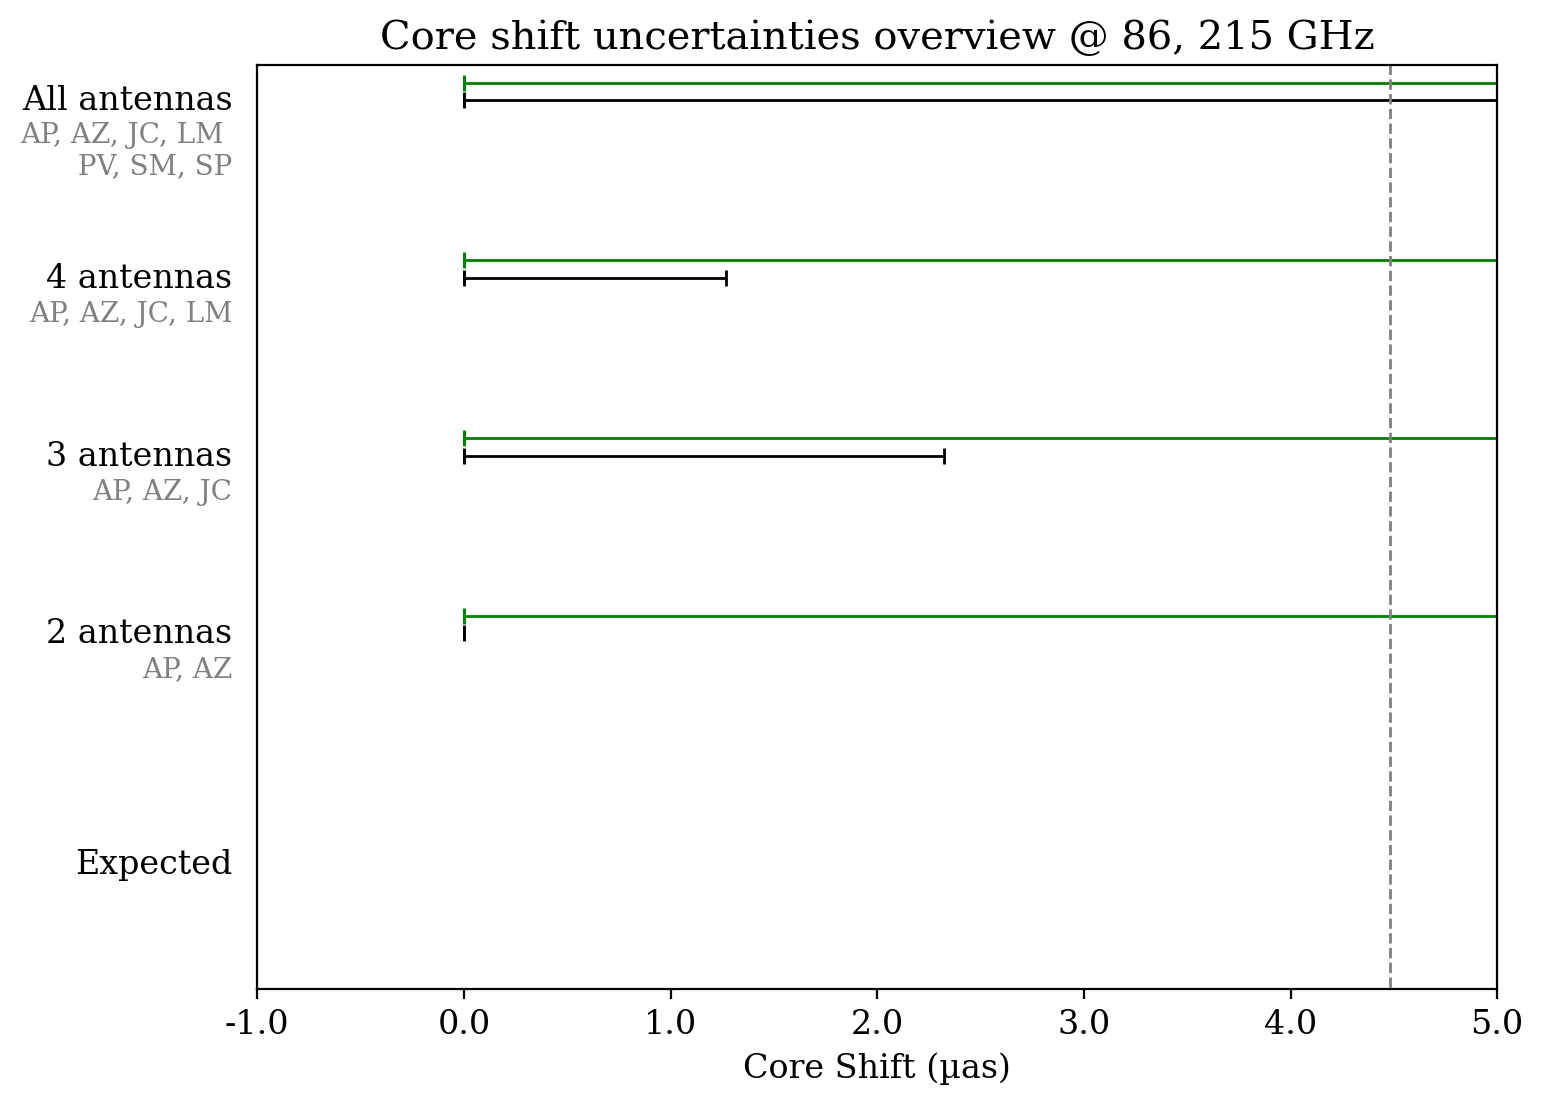

In [54]:
# 86 GHz to 215 GHz

# errors for a typical (average) scan 

median_coreshift_86_215 = np.median(coreshifts_86_215)
mean_coreshift_86_215 = np.mean(coreshifts_86_215)

threshold = .3
mean_coreshift_86_215_10per = mean_coreshift_86_215 * threshold




atm_sigma_list = [ant_based_delay_2tennas, ant_based_delay_3tennas, ant_based_delay_4tennas, ant_based_delay_all]
y = np.array(range(len(atm_sigma_list)))/2
x = [0] * len(atm_sigma_list)
xerr_atm = [[0] * len(atm_sigma_list), atm_sigma_list]


thermal_sigma_list = [source_structure_delay_2tennas, source_structure_delay_3tennas, source_structure_delay_4tennas, source_structure_delay_all]
y_thermal = np.array(range(len(thermal_sigma_list)))/2 +.05
x_thermal = [0] * len(thermal_sigma_list)
xerr_thermal = [[0] * len(thermal_sigma_list), thermal_sigma_list]


fig , ax = plt.subplots(figsize=(8, 6), dpi=200)
transform = mtransforms.blended_transform_factory(ax.transData,ax.transAxes)
ax.boxplot(coreshifts_86_215,
           vert=False,            # horizontal box
           positions=[-.65],     # put it at y = –0.3
           widths=0.15,           # thickness of the box
           patch_artist=True,
           zorder=1,     
           boxprops=dict(facecolor='lightblue', edgecolor='black'),
           medianprops=dict(color='darkblue'),
           label='Core shift boxplot')


ax.scatter(coreshifts_86_215, coreshifts_86_215/coreshifts_86_215 - 1.5, color='black', s=100, marker='|', label = 'Core shifts' )
#ax.scatter(median_coreshift_86_215, - 0.5, color='gray', s=300, marker='|', label='Median core shift')
ax.scatter(mean_coreshift_86_215, -0.65, s=100, color='w', marker='*', edgecolor='k', label='Mean core shift')

ax.errorbar(x, y, xerr=xerr_atm, fmt='|', color='black', markersize=5, elinewidth=1, capsize=3, label='Antenna-based delay @ 0.55 rad, 215 GHz', )
ax.errorbar(x_thermal, y_thermal, xerr=xerr_thermal, fmt='|', color='green', markersize=5, elinewidth=1, capsize=3, label='Source structure delay')

ax.vlines(mean_coreshift_86_215_10per, -100, 100, color='gray', linestyle='--', linewidth=1, label=f'{int(threshold * 100)}% of median core shift')


ax.set_yticks([])
# ax.text(-.02, -.65, 'Core Shift', fontsize=12, rotation=90, transform=transform_r)


# 1) create the blend: x in axes, y in data
trans = mtransforms.blended_transform_factory(ax.transAxes, ax.transData)

# 2) draw your text at y = -0.65, x = just off the left (axes coords)
ax.text(-0.02,            # slightly left of the axis (axes coords)
    -0.65,            # your data‐y location
    "Expected",# whatever you want written
    transform=trans,
    ha='right',       # right‐align so the text is just outside the plot
    va='center',
    # vertically centered on the y = -0.65 line
)

ax.text(-0.02, 0, "2 antennas", transform=trans, ha='right',va='center')

ax.text(-0.02, -0.1, "AP, AZ", transform=trans, ha='right',va='center', color='gray', fontsize=10)


ax.text(-0.02,            # slightly left of the axis (axes coords)
    0.5,            # your data‐y location
    "3 antennas",# whatever you want written
    transform=trans,
    ha='right',       # right‐align so the text is just outside the plot
    va='center'       # vertically centered on the y = -0.65 line
)

ax.text(-0.02, 0.4, "AP, AZ, JC", transform=trans, ha='right',va='center', color='gray', fontsize=10)

ax.text(-0.02,            # slightly left of the axis (axes coords)
    1,            # your data‐y location
    "4 antennas",# whatever you want written
    transform=trans,
    ha='right',       # right‐align so the text is just outside the plot
    va='center'       # vertically centered on the y = -0.65 line
)

ax.text(-0.02, 0.9, "AP, AZ, JC, LM", transform=trans, ha='right',va='center', color='gray', fontsize=10)

ax.text(-0.02,            # slightly left of the axis (axes coords)
    1.5,            # your data‐y location
    "All antennas",# whatever you want written
    transform=trans,
    ha='right',       # right‐align so the text is just outside the plot
    va='center'       # vertically centered on the y = -0.65 line
)

ax.text(-0.02, 1.36, "AP, AZ, JC, LM \n PV, SM, SP", transform=trans, ha='right',va='center', color='gray', fontsize=10)

ax.set_ylim(-1, 1.6)


ax.set_xlabel('Core Shift (µas)')
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x * 1000:.1f}'))  # Convert to μas

ax.set_xlim(-0.001,.005)

ax.set_title('Core shift uncertainties overview @ 86, 215 GHz')
#ax.legend()


In [32]:
ngeht_4tennas_phase_05.thermal_atm.antenna_based_delay_results[:,0,:]

array([[ 0.00055989, -0.0005702 ],
       [-0.00033027, -0.00149326],
       [-0.00018587, -0.00029921],
       ...,
       [ 0.00127713,  0.00075694],
       [ 0.00069734,  0.00083315],
       [ 0.00035784, -0.0036469 ]], shape=(1000, 2))

Text(0, 0.5, 'Antenna-based delay Y (µas)')

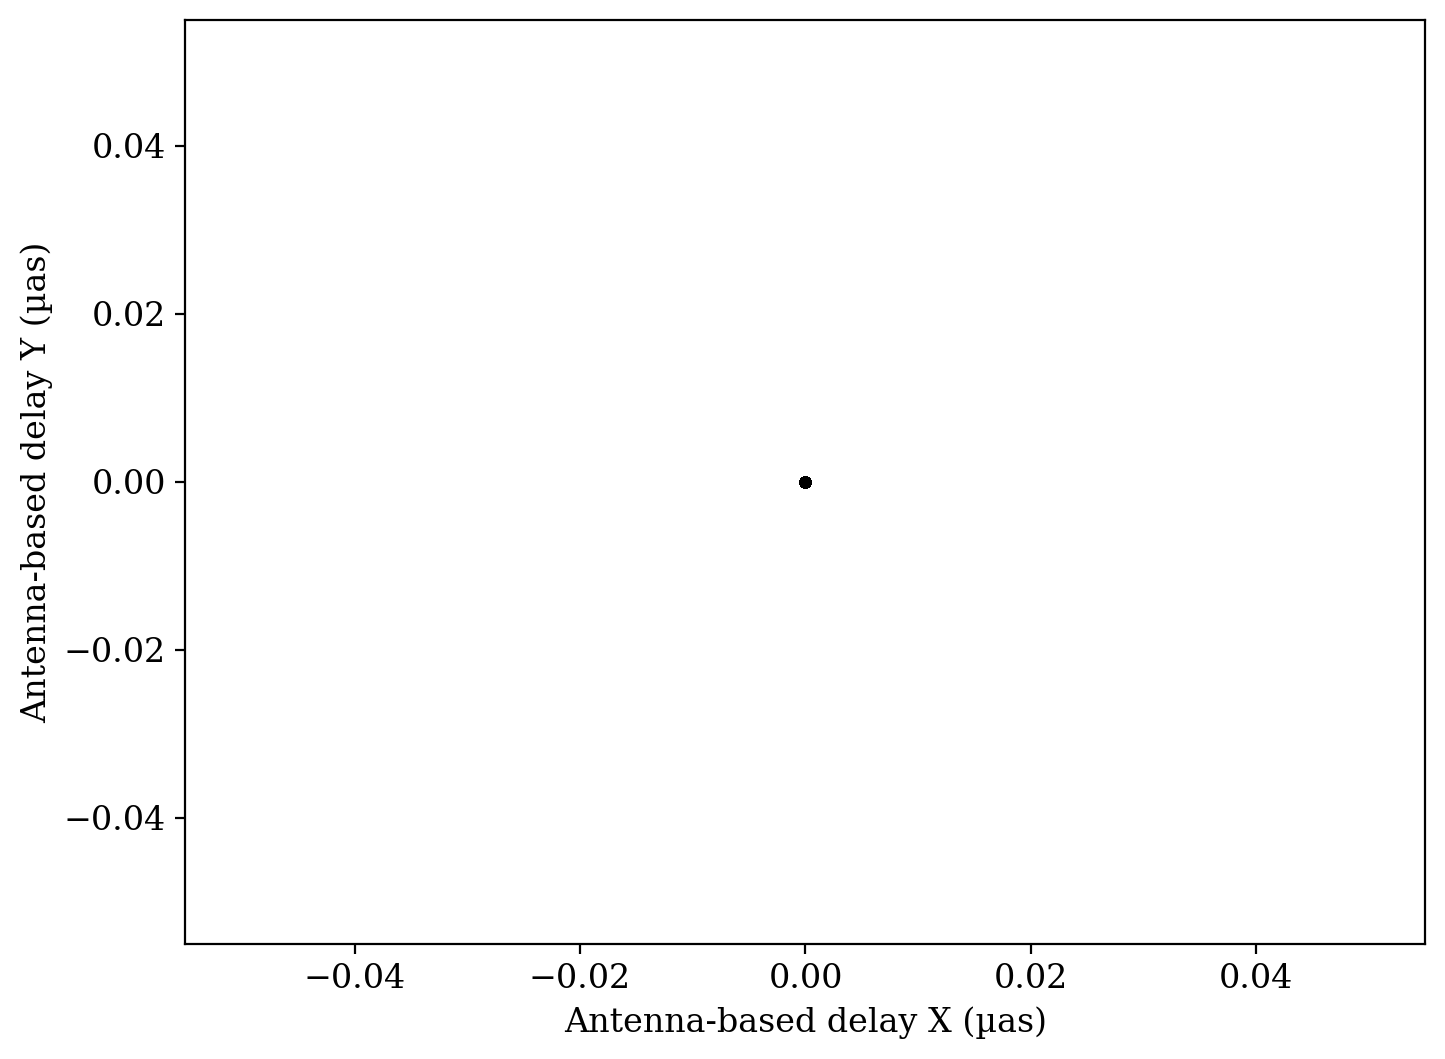

In [22]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=200)
ax.scatter(ngeht_alltennas_phase_05.thermal_atm.antenna_based_delay_results[:,0,0]*1000, ngeht_alltennas_phase_05.thermal_atm.antenna_based_delay_results[:,0,1]*1000, s=10, color='k', alpha=0.5)
ax.set_xlabel('Antenna-based delay X (µas)')
ax.set_ylabel('Antenna-based delay Y (µas)')

In [23]:
ngeht_alltennas_phase_05.thermal_atm.antenna_based_delay_results[:,0,0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [25]:
ngeht_3tennas_phase_05.list_of_tables_perscan[0]

,Baseline Length (m),Baseline Angle (rad),SNR,tele1,tele2,Time,psi,u_coords,v_coords,phase,phase_seconds
80,7.022747e+06,2.537442,107.454418,AP,AZ,5.251389,1.752044,3.060628e+09,-4.434107e+09,0.096162,6.654217e-14
82,8.502728e+06,2.090998,36.843337,AP,JC,5.251389,1.305600,5.660365e+09,-3.242427e+09,-2.040287,-1.411834e-12
85,3.727649e+06,1.140990,160.787497,AZ,JC,5.251389,0.355592,2.599730e+09,1.191681e+09,1.757469,1.216130e-12


In [39]:
ngeht_4tennas_phase_05_3scans.thermal_atm.atm_obs_angles

array([[ 6.85129923e-04,  1.58918656e-03,  1.75816236e-03, ...,
         2.93637413e-03,  1.09560377e-03, -1.25773913e-04],
       [-1.94077479e-03,  2.93609197e-03, -1.10696762e-03, ...,
         8.77835993e-04, -2.44510186e-03,  1.24678056e-03],
       [ 2.36602400e-03, -9.52128090e-04,  2.35595150e-03, ...,
         6.08210496e-04,  1.06080170e-03, -1.25506832e-04],
       ...,
       [ 8.85420241e-04,  1.29272282e-03,  1.95053210e-03, ...,
         1.56544616e-03,  8.90281669e-04, -1.95078992e-03],
       [ 2.66723202e-03, -3.43006298e-04,  1.97982501e-03, ...,
        -3.54181128e-03,  5.37592126e-05, -1.12282573e-03],
       [-1.89219553e-03, -1.17361321e-04,  8.74052453e-04, ...,
        -1.26407578e-03,  5.69307321e-04,  9.53625940e-04]],
      shape=(15, 100))

In [48]:
rms_distance(ngeht_4tennas_phase_05.thermal_atm.antenna_based_delay_results[:,0,:]) * 1000

np.float64(1.3636571026834174)

In [49]:
np.mean(np.std(ngeht_4tennas_phase_05_3scans.thermal_atm.atm_obs_angles, axis=1)) * 1000

np.float64(1.8937340540114165)